## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [3]:
## 
"""
Your code here (optional)
確認硬體資源
"""
!nvidia-smi

In [4]:
import os
import keras

# 請嘗試設定 GPU：os.environ
os.environ['CUDA_VISIBLE_DEVICES']=''

In [5]:
train, test = keras.datasets.cifar10.load_data()

In [6]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x):
    x = ((x/255)-0.5)*2
    x = x.reshape((len(x), -1))
    return x

def preproc_y(y):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, 10)
    return y
    

In [7]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [9]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 64]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
output (Dense)               (None, 10)                650       
Total params: 1,746,506
Trainable params: 1,

In [10]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [11]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [12]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)


Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 6s 112us/step - loss: 1.6976 - accuracy: 0.4002 - val_loss: 1.5454 - val_accuracy: 0.4577
Epoch 2/100
50000/50000 [==============================] - 5s 108us/step - loss: 1.4663 - accuracy: 0.4824 - val_loss: 1.4475 - val_accuracy: 0.4846
Epoch 3/100
50000/50000 [==============================] - 6s 116us/step - loss: 1.3464 - accuracy: 0.5258 - val_loss: 1.3824 - val_accuracy: 0.5109
Epoch 4/100
50000/50000 [==============================] - 6s 115us/step - loss: 1.2534 - accuracy: 0.5578 - val_loss: 1.4237 - val_accuracy: 0.4998
Epoch 5/100
50000/50000 [==============================] - 6s 115us/step - loss: 1.1721 - accuracy: 0.5885 - val_loss: 1.3779 - val_accuracy: 0.5199
Epoch 6/100
50000/50000 [==============================] - 6s 113us/step - loss: 1.0942 - accuracy: 0.6125 - val_loss: 1.3833 - val_accuracy: 0.5247
Epoch 7/100
50000/50000 [==============================

50000/50000 [==============================] - 5s 108us/step - loss: 0.1097 - accuracy: 0.9635 - val_loss: 4.1592 - val_accuracy: 0.5246
Epoch 55/100
50000/50000 [==============================] - 6s 122us/step - loss: 0.1071 - accuracy: 0.9631 - val_loss: 4.4020 - val_accuracy: 0.5215
Epoch 56/100
50000/50000 [==============================] - 6s 113us/step - loss: 0.1021 - accuracy: 0.9659 - val_loss: 4.2691 - val_accuracy: 0.5202
Epoch 57/100
50000/50000 [==============================] - 6s 120us/step - loss: 0.0906 - accuracy: 0.9697 - val_loss: 4.5286 - val_accuracy: 0.5221
Epoch 58/100
50000/50000 [==============================] - 6s 117us/step - loss: 0.0964 - accuracy: 0.9682 - val_loss: 4.4319 - val_accuracy: 0.5243
Epoch 59/100
50000/50000 [==============================] - 6s 119us/step - loss: 0.1194 - accuracy: 0.9609 - val_loss: 4.3801 - val_accuracy: 0.5173
Epoch 60/100
50000/50000 [==============================] - 6s 117us/step - loss: 0.0987 - accuracy: 0.9673 - val

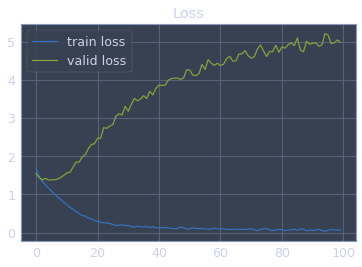

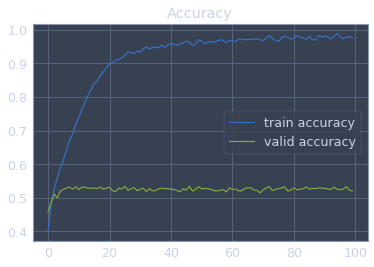

In [14]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [15]:
! jupyter nbconvert --to html Day_078_HW.ipynb Day_078_CheckBeforeTrain.ipynb

[NbConvertApp] Converting notebook Day_078_HW.ipynb to html
[NbConvertApp] Writing 379971 bytes to Day_078_HW.html
[NbConvertApp] Converting notebook Day_078_CheckBeforeTrain.ipynb to html
[NbConvertApp] Writing 425555 bytes to Day_078_CheckBeforeTrain.html
